# Data Exploration and Visualization

Setting correct path to data files

In [5]:
import sys
import os
import yaml

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(ROOT_DIR)

CONFIG_PATH = os.path.join(ROOT_DIR, "config.yaml")
with open(CONFIG_PATH, "r") as file:
    config = yaml.safe_load(file)

config["data"]["train_imgs"] = os.path.join(ROOT_DIR, config["data"]["train_imgs"])
config["data"]["train_labels"] = os.path.join(ROOT_DIR, config["data"]["train_labels"])
config["data"]["test_imgs"] = os.path.join(ROOT_DIR, config["data"]["test_imgs"])
config["data"]["test_labels"] = os.path.join(ROOT_DIR, config["data"]["test_labels"])

Loading data

In [6]:
from src.loader import Load

loader = Load(config)
(x_train, y_train), (x_test, y_test) = loader.load_data()

Confirming data loaded correctly and exploring shapes.

In [7]:
import numpy as np
print("Dataset loaded successfully!")
print(f"Training set: {x_train.shape} - Labels: {y_train.shape}")
print(f"Test set: {x_test.shape} - Labels: {y_test.shape}")

print(f"Pixel value range: {x_train.min()} to {x_train.max()}")
print(f"number of classes: {len(np.unique(y_train))}")

Dataset loaded successfully!
Training set: (60000, 28, 28) - Labels: (60000,)
Test set: (10000, 28, 28) - Labels: (10000,)
Pixel value range: 0.0 to 1.0
number of classes: 10


Randomaly outputing 10 random raw images with their label.

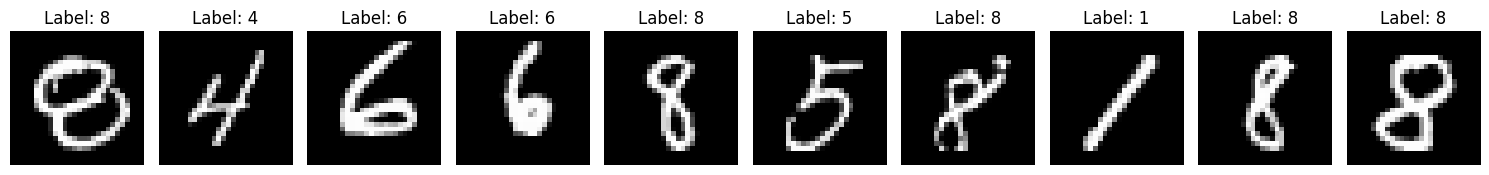

In [8]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    ax = axes[i]
    idx = np.random.randint(0, len(x_train))
    ax.imshow(x_train[idx], cmap="gray")
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

Visualizing the distribution of digit labels in the training dataset

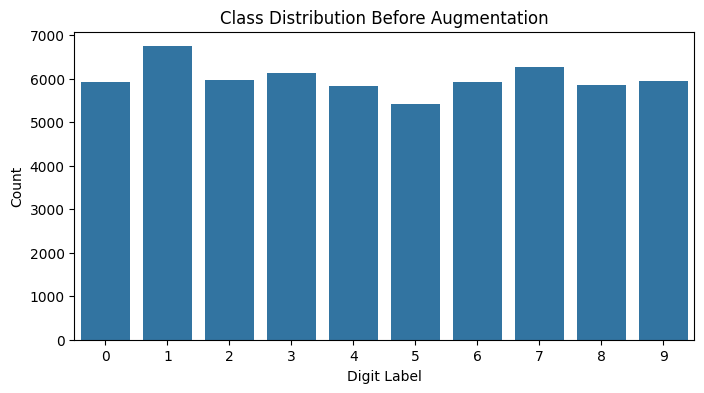

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 4))
sns.barplot(x=unique, y=counts)
plt.title("Class Distribution Before Augmentation")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

Visualizing each augmentation on a single image

2025-01-20 21:42:48.383189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


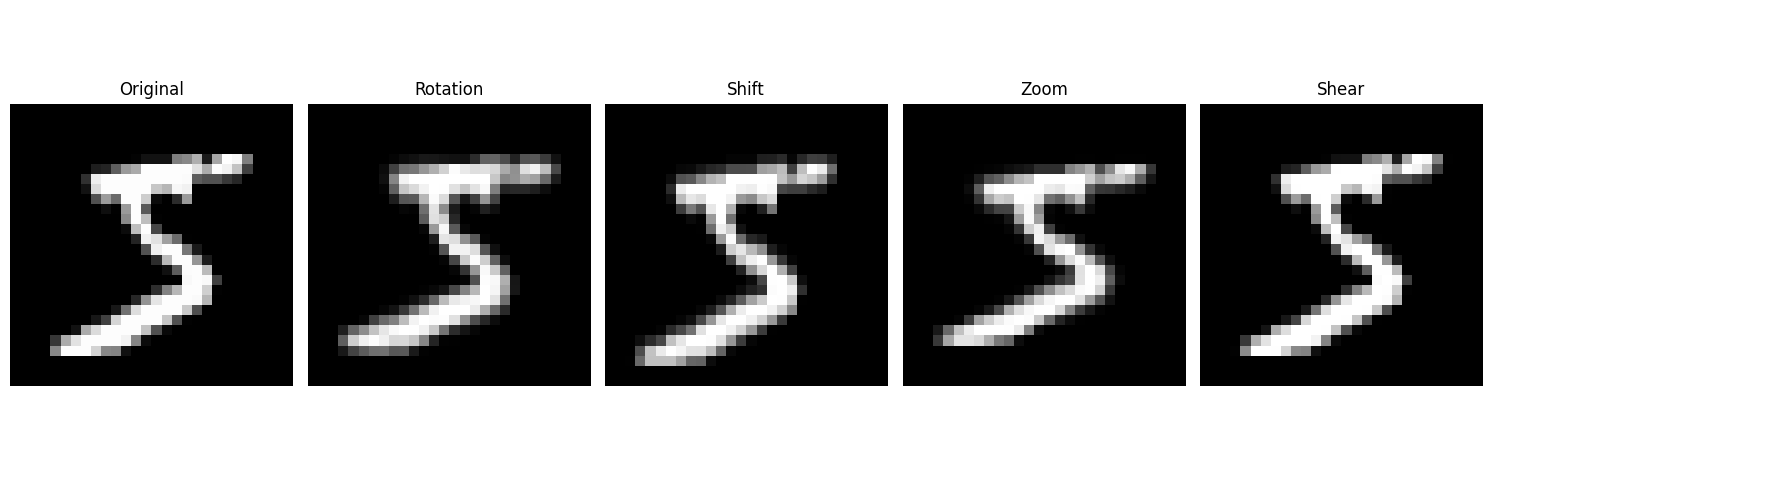

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
sample_image = np.expand_dims(x_train[0], axis=(0, -1))

# Define augmentation
rotation_gen = ImageDataGenerator(rotation_range=config["augmentation"]["rotation"])
shift_gen = ImageDataGenerator(width_shift_range=config["augmentation"]["width_shift"], 
                               height_shift_range=config["augmentation"]["height_shift"])
zoom_gen = ImageDataGenerator(zoom_range=config["augmentation"]["zoom"])
shear_gen = ImageDataGenerator(shear_range=config["augmentation"]["shear"])

# Applying
rotated_image = next(iter(rotation_gen.flow(sample_image)))[0]
shifted_image = next(iter(shift_gen.flow(sample_image)))[0]
zoomed_image = next(iter(zoom_gen.flow(sample_image)))[0]
sheared_image = next(iter(shear_gen.flow(sample_image)))[0]

# Label
fig, axes = plt.subplots(1, 6, figsize=(18, 5))

axes[0].imshow(sample_image[0].squeeze(), cmap="gray")
axes[0].set_title("Original")

axes[1].imshow(rotated_image.squeeze(), cmap="gray")
axes[1].set_title("Rotation")

axes[2].imshow(shifted_image.squeeze(), cmap="gray")
axes[2].set_title("Shift")

axes[3].imshow(zoomed_image.squeeze(), cmap="gray")
axes[3].set_title("Zoom")

axes[4].imshow(sheared_image.squeeze(), cmap="gray")
axes[4].set_title("Shear")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()

Visualizing fully augmented vs original on 10 random pictures

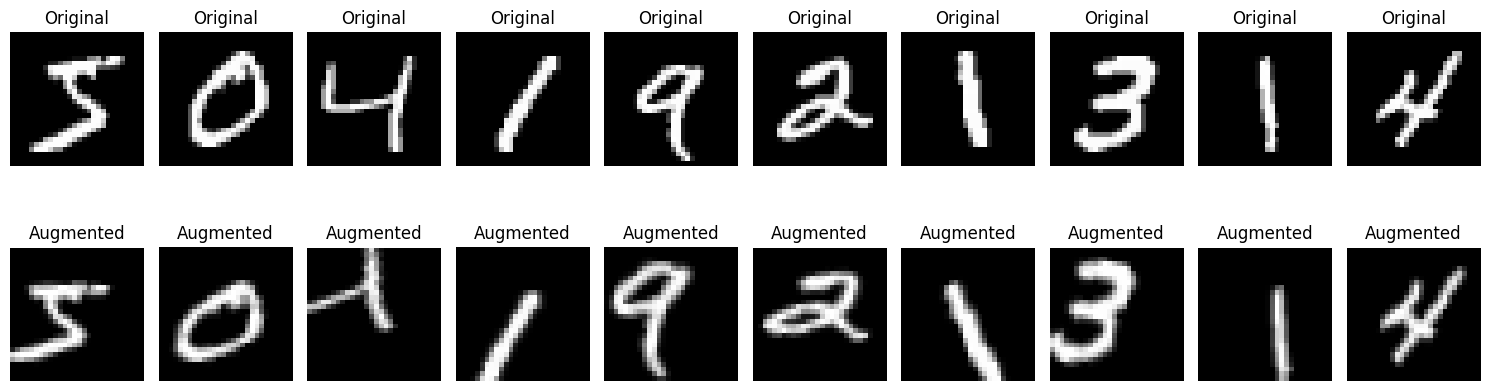

In [11]:
from src.augmenter import Augmenter

augmenter = Augmenter(config)
augmented_images = []

for i in range(10):
    batch = augmenter.augment(x_train[i:i+1], y_train[i:i+1], batch_size=1)
    augmented_images.append(next(batch)[0][0])

# Org vs Aug
fig, axes = plt.subplots(2, 10, figsize=(15, 5))

for i in range(10):
    axes[0, i].imshow(x_train[i], cmap="gray")
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")

    axes[1, i].imshow(augmented_images[i].squeeze(), cmap="gray")
    axes[1, i].set_title("Augmented")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()